<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/CV8_EdgeBasedSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clone the repo**

In [1]:
!git clone -l -s https://github.com/cagBRT/computer-vision.git cloned-repo
%cd cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 3897, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 3897 (delta 112), reused 106 (delta 59), pack-reused 3689
Receiving objects: 100% (3897/3897), 442.06 MiB | 21.45 MiB/s, done.
Resolving deltas: 100% (1447/1447), done.
Updating files: 100% (2300/2300), done.
/content/cloned-repo


**Import the necessary libraries**

In [2]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import cv2
from google.colab.patches import cv2_imshow

# **Edge Based Segmentation**
This notebook explores using the edges of object to do image segmentation

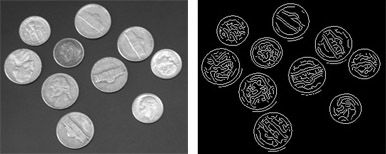

In [3]:
image = cv2.imread("/content/cloned-repo/images/edgeDetection.jpg")
cv2_imshow(image)

**Using convolution to detect edges in images**<br>
What divides two objects in an image? There is always an edge between two adjacent regions with different grayscale values (pixel values). The edges can be considered as the discontinuous local features of an image.<br>

We can make use of this discontinuity to detect edges and hence define a boundary of the object. This helps us in detecting the shapes of multiple objects present in a given image.

Using convolution we can detect the edges of objects.

In [4]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1086/1*Ff6mG3aPdWFkjb6hZPy3Xw.gif')

**Sobel Filters used for edge detection**<br>
The Sobel filter is used for edge detection. It works by calculating the gradient of image intensity at each pixel within the image. It finds the direction of the largest increase from light to dark and the rate of change in that direction

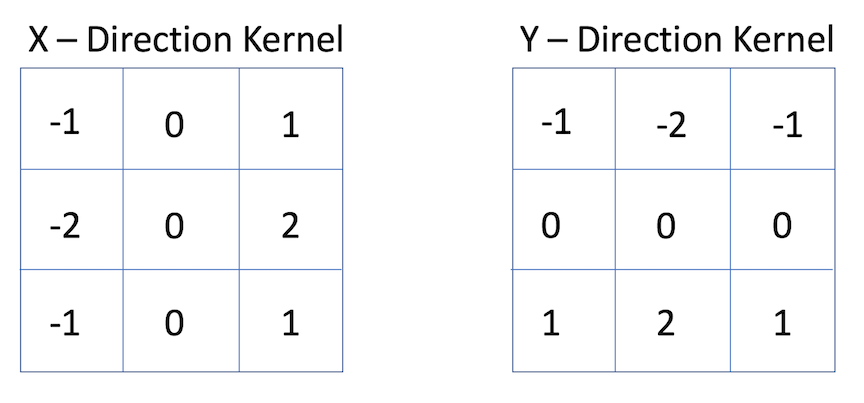

In [5]:
image = cv2.imread("/content/cloned-repo/images/sobelFilters.png")
cv2_imshow(image)

When there is a big change in the pixel value in the convoluted image - this indicates an edge.

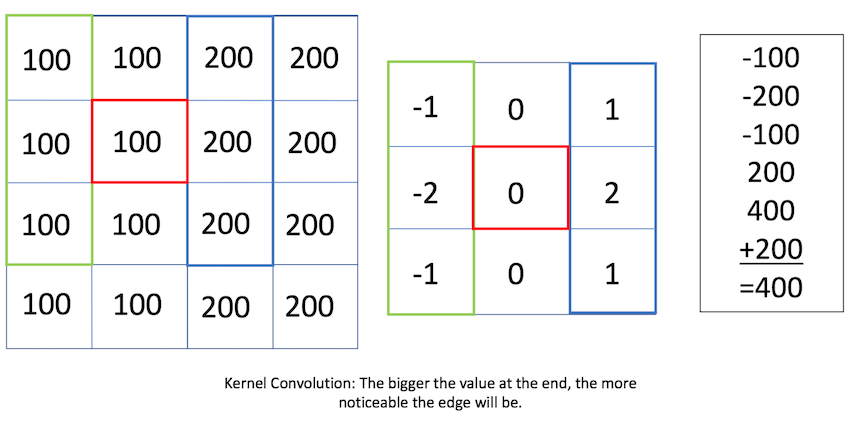

In [6]:
image = cv2.imread("/content/cloned-repo/images/kernelConvolution.png")
cv2_imshow(image)

This Kernel Convolution is an example of an X Direction Kernel usage. If an image were scanning from left to write, we can see that if the filter was set at (2,2) in the image above, it would have a value of 400 and therefore would have a fairly prominent edge at that point. If a user wanted to exaggerate the edge, then the user would need to change the filter values of -2 and 2 to higher magnitude. Perhaps -5 and 5. This would make the gradient of the edge larger and therefore, more noticeable.

Once the image is processed in the X direction, we can then process the image in the Y direction. Magnitudes of both the X and Y kernels will then be added together to produce a final image showing all edges in the image.

The first step to using Sobel Edge Detection is to convert the image to grayscale. While it is possible to use the algorithm in standard RGB scale, it is easier to implement in a grayscale.

**Load an image**

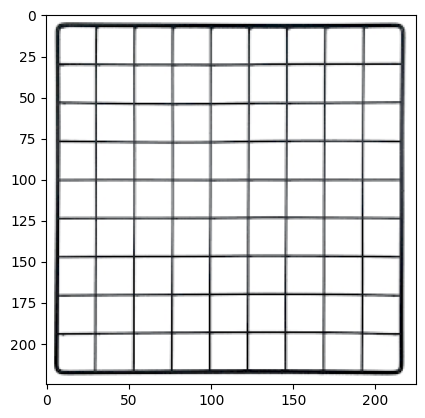

In [7]:
image = plt.imread('/content/cloned-repo/images/index.png')[:,:,:3]
plt.imshow(image)


**Convert the image to grayscale**

In [8]:
# converting to grayscale
gray = rgb2gray(image)

**Define the Sobel filters**

In [9]:
# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges\n')

sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


**Use the Sobel filters to do convolution on the image**

In [10]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

**The convoluted images**

Here, we are able to identify the horizontal as well as the vertical edges. There is one more type of filter that can detect both horizontal and vertical edges at the same time. This is called the laplace operator:

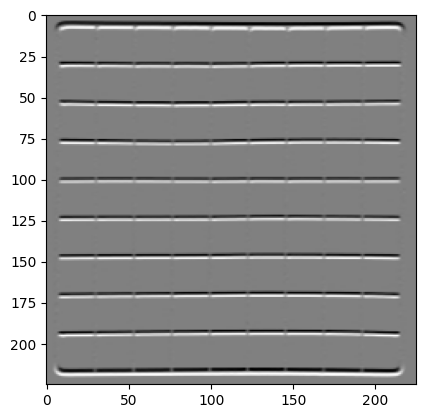

In [11]:
plt.imshow(out_h, cmap='gray')

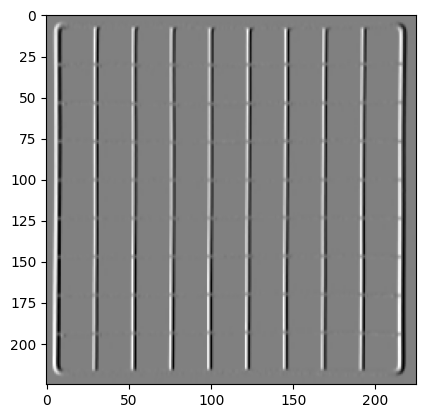

In [12]:
plt.imshow(out_v, cmap='gray')

**LaPlacian Filter**<br>
Use a LaPlacian filter to get the horizontal and vertical edges on the same image

In [13]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


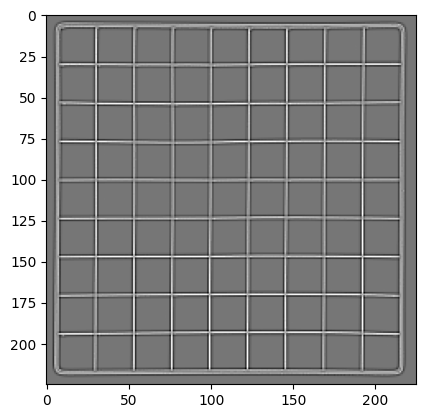

In [14]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

# **Assignment**
Use the above methods to detect edges in:<br>
 /content/cloned-repo/images/dogsOnBeach.jpg

1. Modify the center value of the Laplacian kernel to see the changes in the detection of the edges.

In [15]:
#Assignment
